In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
mplparams = {
    'text.usetex': True,
    'axes.linewidth': 1,
    'lines.linewidth' : 1.5,
    'axes.grid': False,
    'axes.labelweight': 'normal',
    'font.family': 'DejaVu Sans',
    'font.size': 26,
    'figure.figsize': (10,8),
    'legend.fontsize': 26,
    'legend.handlelength' : 2,
    'axes.grid' : True
}
matplotlib.rcParams.update(mplparams)

In [2]:
red = '#D60606'
blue = '#0083DE'
green = '#00BA75'
yellow = '#FFC61E'
purple = '#A433B3'
orange = '#FD882E'

## Multiple curves

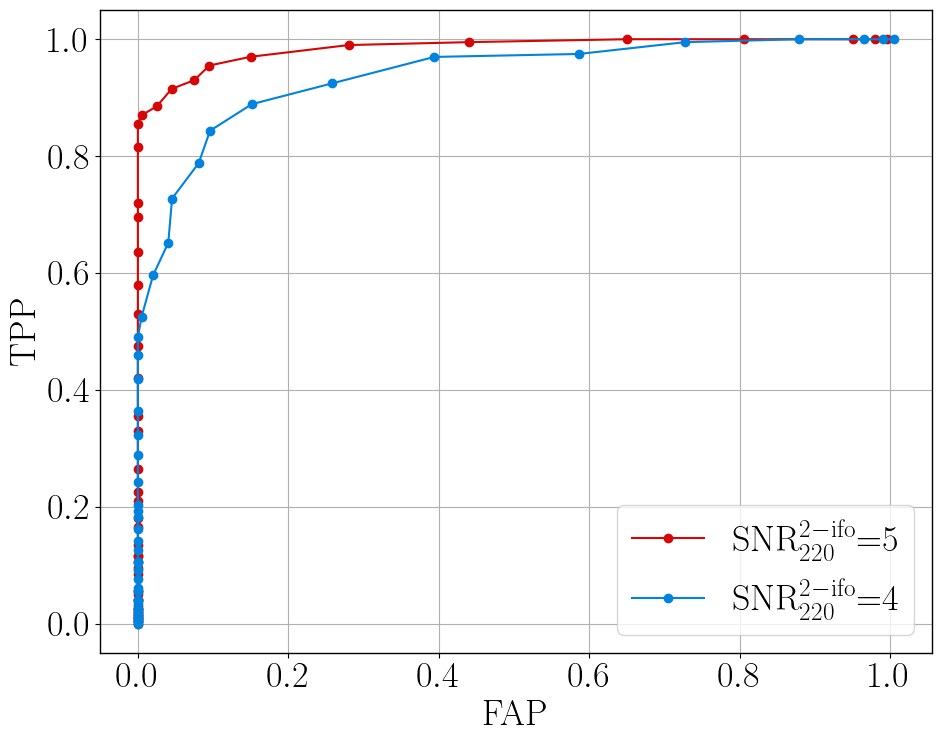

In [3]:
false_pos = data = np.loadtxt("results/2detector_O4_design_overfiltered_220:None_ALL.dat")
false_pos = false_pos[:,2]-false_pos[:,1]

false_neg = np.loadtxt("results/220:null_SNR=5_ALL.dat").T[1]
temp = np.append(false_pos, false_neg)
thresh_space = np.linspace(min(temp), max(temp), 50, endpoint=True)
true_pos = [np.count_nonzero(false_neg > i)/len(false_neg) for i in thresh_space]
false_alarm = [np.count_nonzero(false_pos > i)/len(false_neg) for i in thresh_space]
pl.plot(false_alarm, true_pos, '-o', c=red, label=r'SNR$^{\rm 2-ifo}_{220}$=5')

false_neg = np.loadtxt("results/220:null_SNR=4_ALL.dat").T[1]
temp = np.append(false_pos, false_neg)
thresh_space = np.linspace(min(temp), max(temp), 50, endpoint=True)
true_pos = [np.count_nonzero(false_neg > i)/len(false_neg) for i in thresh_space]
false_alarm = [np.count_nonzero(false_pos > i)/len(false_neg) for i in thresh_space]
pl.plot(false_alarm, true_pos, '-o', c=blue, label=r'SNR$^{\rm 2-ifo}_{220}$=4')

# false_neg = np.loadtxt("results/220:null_SNR=4_ALL.dat").T[1]
# thresh_space = np.linspace(0, max(-false_neg), 50, endpoint=True)
# true_pos = [np.count_nonzero(-false_neg > i)/len(false_neg) for i in thresh_space]
# false_alarm = [np.count_nonzero(false_pos > i)/len(false_neg) for i in thresh_space]
# pl.plot(false_alarm, true_pos, '-o', label=r'SNR$_{221}$=4')

pl.legend();
pl.xlabel("FAP")
pl.ylabel("TPP")
pl.tight_layout()
pl.savefig("plots/1mode_ROC_curve.pdf")

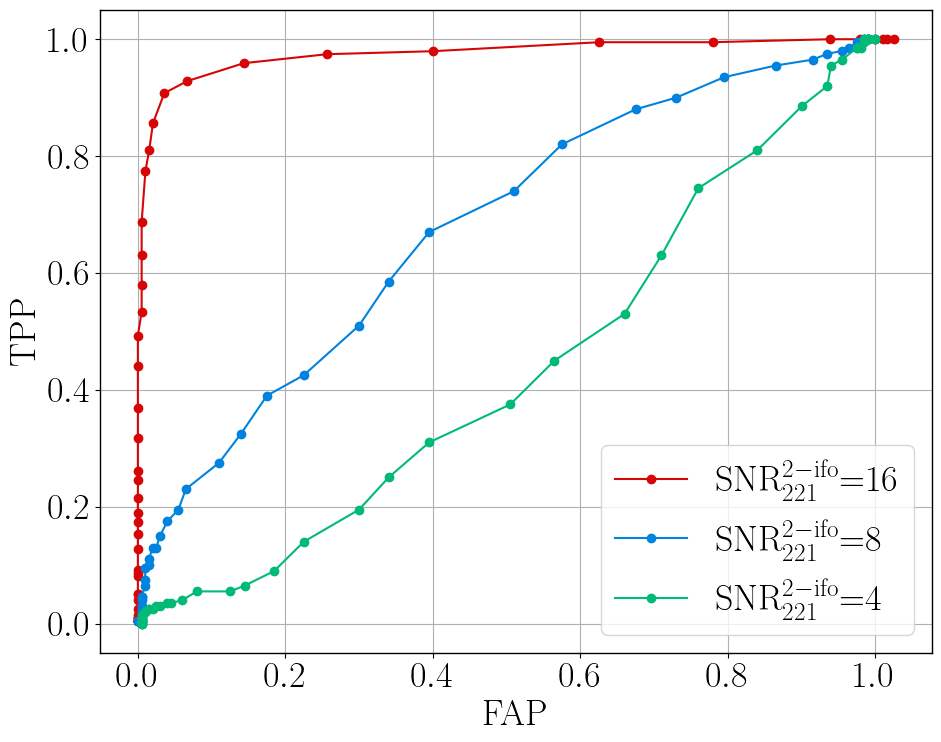

In [5]:
false_pos = np.loadtxt("results/O4_design_overfiltered_220+221:220_ALL.dat")
false_pos = false_pos[:,2]-false_pos[:,1]

false_neg = np.loadtxt("results/SNR=16_ALL.dat")
false_neg = false_neg[:,1]-false_neg[:,2]
temp = np.append(false_pos, false_neg)
thresh_space = np.linspace(min(temp), max(temp), 50, endpoint=True)
true_pos = [np.count_nonzero(false_neg >= i)/len(false_neg) for i in thresh_space]
false_alarm = [np.count_nonzero(false_pos >= i)/len(false_neg) for i in thresh_space]
pl.plot(false_alarm, true_pos, '-o', c=red, label=r'SNR$_{221}^{\rm 2-ifo}$=16')

false_neg = np.loadtxt("results/SNR=8_ALL.dat")
false_neg = false_neg[:,1]-false_neg[:,2]
temp = np.append(false_pos, false_neg)
thresh_space = np.linspace(min(temp), max(temp), 50, endpoint=True)
true_pos = [np.count_nonzero(false_neg >= i)/len(false_neg) for i in thresh_space]
false_alarm = [np.count_nonzero(false_pos >= i)/len(false_neg) for i in thresh_space]
pl.plot(false_alarm, true_pos, '-o', c=blue, label=r'SNR$_{221}^{\rm 2-ifo}$=8')

false_neg = np.loadtxt("results/SNR=4_ALL.dat")
false_neg = false_neg[:,1]-false_neg[:,2]
temp = np.append(false_pos, false_neg)
thresh_space = np.linspace(min(temp), max(temp), 50, endpoint=True)
true_pos = [np.count_nonzero(false_neg >= i)/len(false_neg) for i in thresh_space]
false_alarm = [np.count_nonzero(false_pos >= i)/len(false_neg) for i in thresh_space]
pl.plot(false_alarm, true_pos, '-o', c=green, label=r'SNR$_{221}^{\rm 2-ifo}$=4')

pl.legend();
pl.xlabel("FAP")
pl.ylabel("TPP")
pl.tight_layout()
pl.savefig("plots/2mode_ROC_curve.pdf")

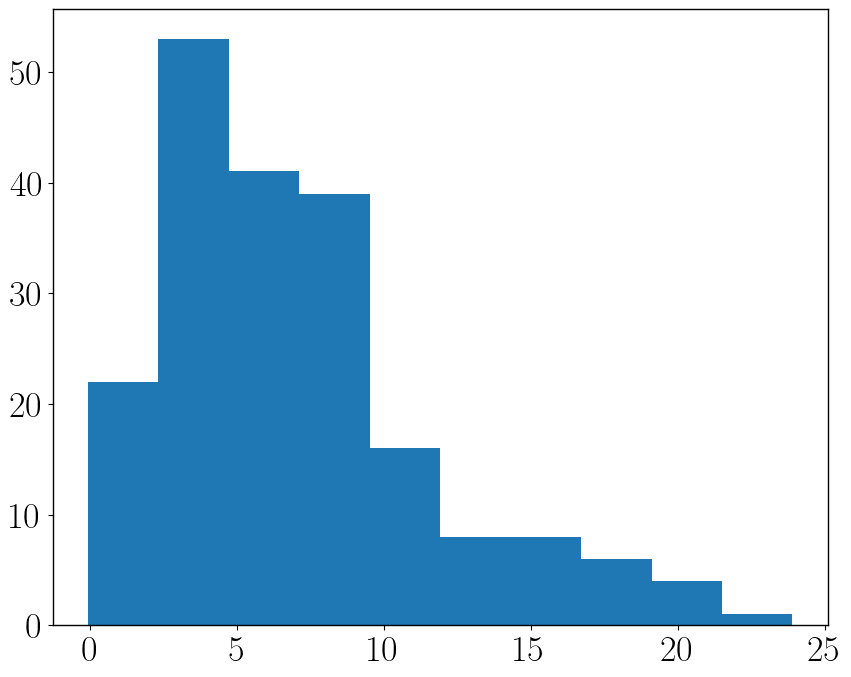

In [7]:
false_neg = np.loadtxt("results/220:null_SNR=4_ALL.dat").T[1]
pl.hist(false_neg);